<a href="https://colab.research.google.com/github/PerfectMach1ne/uni-ai-ml/blob/main/wyklad3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


**Agenda**
1.   Wprowadzenie do uczenia maszynowego. Podstawowe pojęcia związane z uczeniem maszynowym
2.   Idea regresji
3.   Idea klasyfikacji
4.   Rodzaje klasyfikatorów
5.   Ocena modelu - metryki
6.   Przykład klasyfikacji
7.   Underfitting vs overfitting
8.   Cross walidacja
9.   Metody uczenia beznadzoru


Wstęp do sztucznej inteligencji:

https://www.youtube.com/watch?v=mJeNghZXtMo&ab_channel=HubSpotMarketing

**Sztuczna inteligencja, uczenie maszynowe, uczenie głębokie**

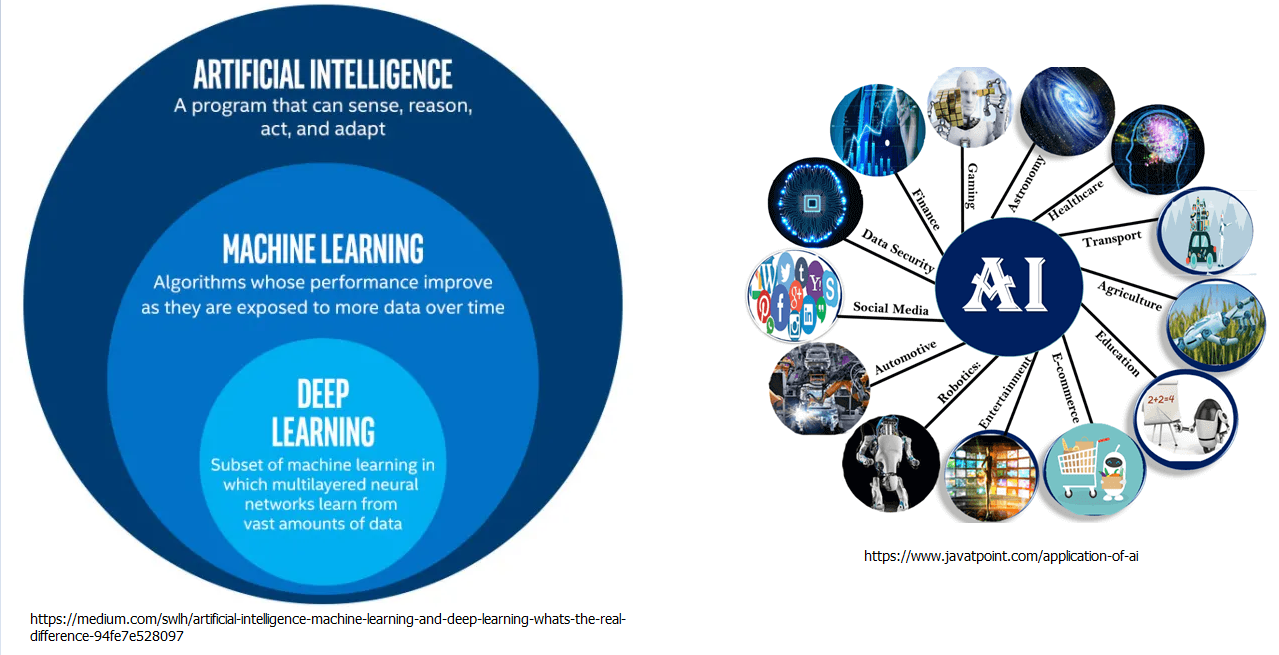

**Wprowadzenie do uczenia maszynowego.**

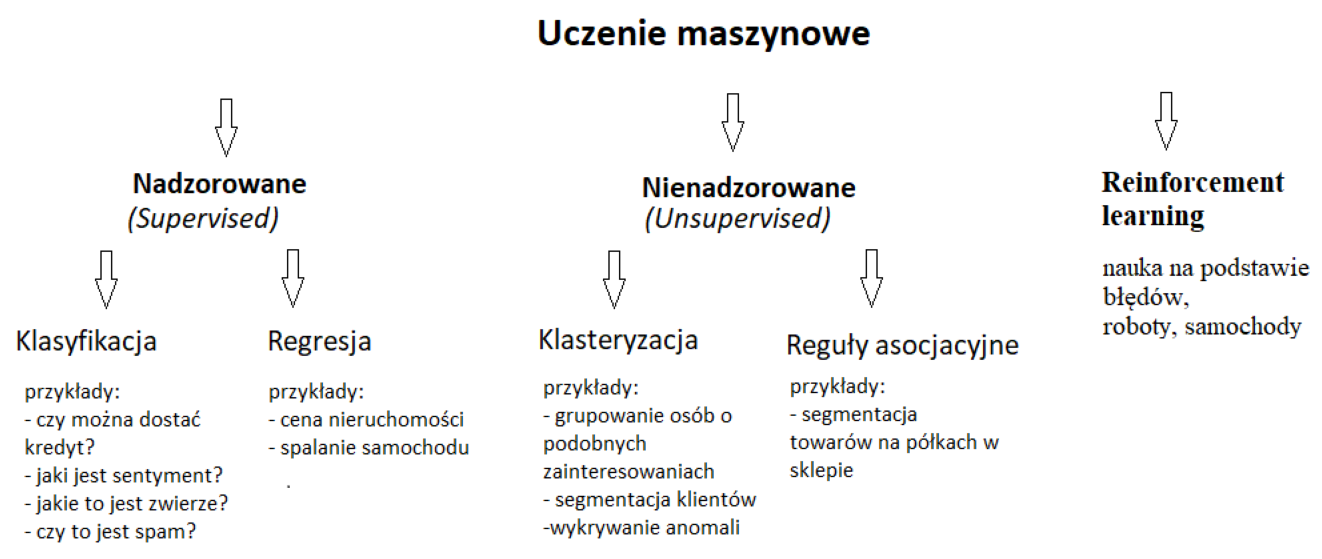

**Idea uczenia maszynowego**

Uczenie maszynowe to rodzina technik pozwalających na wykrywanie zależności, zasad oraz wzorców występujących świecie rzeczywistym na podstawie obserwacji opisywanych przez cechy. Wykryte zasady pozwalają na dokonanie predykcji dla nowych danych, które nie były brane pod uwagę w procesie uczenia.

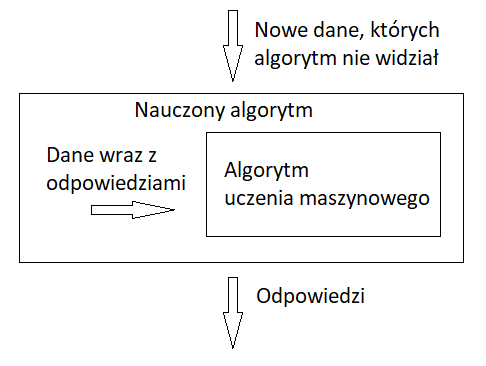

**Pipeline procesu uczenia maszynowego:**
1. Określenie problemu. Należy odpowiedzieć na następujące pytania: jaki problem chcemy rozwiązać za pomocą uczenia maszynowego? jaki rodzaj uczenia maszynowego cchemy zastosować? jakie są minimalne wymagania modelu?
2. Pozyskanie danych. Należy odpowiedzieć na następujące pytania: gdzie znajdują się dane? jakiego typu są dane?, jakiej jakości są dane?
3. Analizowanie danych. Należy odpowiedzieć na następujące pytania: jakiego typu są poszczególne dane? czy w danych występują braki? jakie są rozkłady danych? czy dane ze sobą korelują? jakie są podstawowe statystyki?
4. Przygotowanie danych np. uzupełnić braki danych, zastąpić outliery, usunąć niektóre cechy, ujednolicić dane, przekształcić cechy
5.  Dobranie odpowiednich modeli. Przeprowadzenie klasyfikacji/regresji.
6.  Testowanie. Próba ulepszenia modelu. Wybór optymalnego rozwiązania.
7.  Wdrożenie modelu



**Podstawowe pojęcia związane z uczeniem maszynowym - dane:**
 1. Zbiór danych (dataset) - zbiór danych, który ma zostać poddany analizie, np. zbiór danych o klientach kupujących ubezpieczenie podróżne
 2. Obserwacja (observation) - pojedynczy element zbioru, np. pojedynczy klient
 3. Cecha (feature) - parametr za pomocą krórego opisywane są obserwacje, np. wiek, roczny dochód, status frequent flyer
 4. Predykcja (prediction) - proces wyznaczania wartości jednych cech na podstawie innych cech, np. na podstawie wieku, rocznego dochodu, liczby członków rodziny można przewidzieć czy klient kupi ubezpieczenie.
 5. Cecha niezależna (independent feature) - cecha, na podstawie, której wykonywana jest predykcja (przewidywanie), np. wiek, roczny dochód, liczba członków rodziny
 6. Cecha zależna (dependent feature) - cecha, której wartość jest przewidywana - jest wynikiem predykcji, np. kupienie ubezpieczenia podróżnego, rozróżnianie zwierząt
 7. Cecha ilościowa (quantitative feature) - cecha, dla której zdefiniowana jest operacja porównania (<), np. wiek, roczny przychód
 8. Cecha jakościowa lub kategorialna (qualitative feature or categorical feature) - cecha, dla której operacja porównania (<) nie ma sensu, możemy jedynie stwierdzić, że coś jest równe albo różne, np. rodzaj zatrudnienia, ulubiony kolor, typ wykształcenia, płeć



In [ ]:
import pandas as pd
import os
from pathlib import Path
current_path = Path(os.path.dirname(os.path.abspath("__file__")))
file_name="TravelInsurancePrediction_lab4.csv"
data=pd.read_csv(os.path.join(current_path,file_name))

In [ ]:
data.head(3)

,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
0,31,Government Sector,Yes,400000,6,1,No,No,0
1,31,Private Sector/Self Employed,Yes,1250000,7,0,No,No,0
2,34,Private Sector/Self Employed,Yes,500000,4,1,No,No,1


Cechy: Age, Employment Type,GraduateOrNot, AnnualIncome, FamilyMembers, ChronicDiseases, FrequentFlyer, EverTravelledAbroad, TravelInsurance

Cechy ilościowe: Age, AnnualIncome, FamilyMembers

Cechy jakościowe: Employment Type, GraduateOrNot, ChronicDiseases, FrequentFlyer, EverTravelledAbroad, TravelInsurance

Cechy niezależna: Age, Employment Type,GraduateOrNot, AnnualIncome, FamilyMembers, ChronicDiseases, FrequentFlyer, EverTravelledAbroad

Cechy zależne: TravelInsurance

**Podstawowe pojęcia związane z uczeniem maszynowym - proces uczenia:**
1.  Zbiór wejściowy (input) - zbiór wartości cech niezależnych dla zbioru danych, czyli to co wchodzi do modelu. Oznaczany jest jako X.
2.  Zbiór wyjściowy (output) - zbiór wartości cech zależnych dla zbioru danych, czyli to co będzie przewidywane. Oznaczany jest jako y lub target.
3.  Model (model) - algorytm, który jest uczony i za pomocą, któego wykonywana jest predykcja.
4.  Uczenie modelu (model training) - proces dostosowywania parametrów modelu.
5.  Zbiór uczący (training dataset) - zbiór danych na podstawie, któego wykonywane jest uczenie modelu. Oznaczany jest zwykle jako X_train, y_train
6.  Zbiór testowy (test dataset) - zbiór za pomocą, którego wykonywane jest sprawdzenie jakości działania modelu. Oznaczany jest zwykle jako X_test, y_test

**Ważne!**
Żadna obserwacja ze zbioru testowego nie może wystąpić w zbiorze uczącym. Dane ze zbioru testowego nie mogą wystąpić w procesie uczenia nawet pośrednio tj. na ich podstawie nie może być wyznaczana np. średnia.

Przykład:

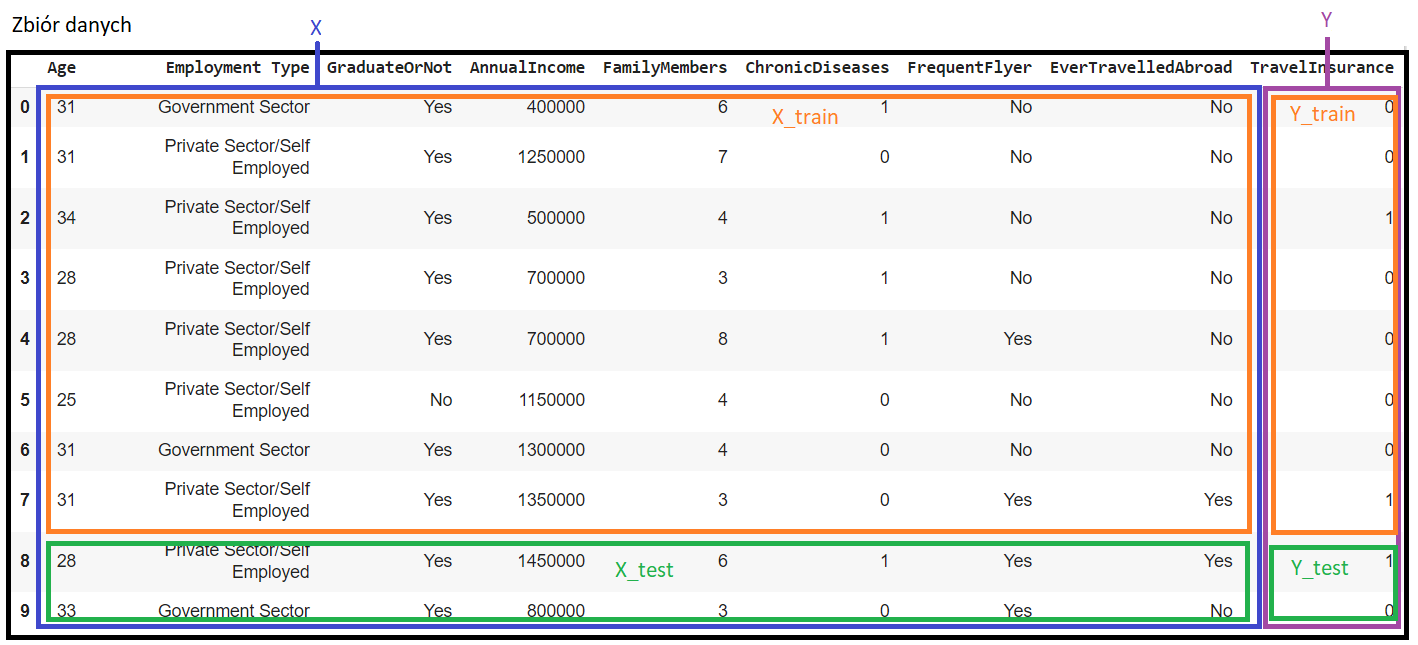

**Zadanie do zrobienia**

Na podstawie poniższego słownika danych utwórz ramkę i wykonaj poniższe zadania:
1. Znajdź cechy ilościowe i jakościowe
2. Stwórz zbior X zawierający cechy niezależne oraz y - zawierający cechę zależną.

In [ ]:
example= {'education': ["basic","secondary","basic","higher","secondary",np.nan,"higher","higher"],
          'asalary':[1000,5000,3500, 4500,5500,3500,np.nan,4000],
          'sex':["W","M","M","M","W","M","W","M"],
          'children':[0,1,2,1,3,2,1,0],
          'hasCar':[0,1,1,0,1,1,1,0]}

**Proces uczenia i testowania - schemat**

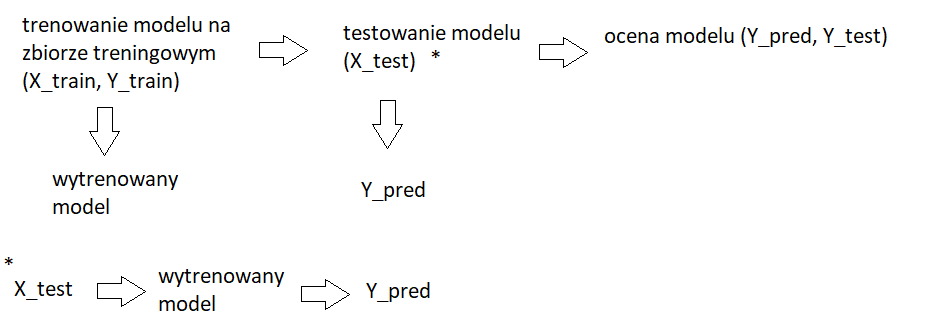

Podział zbioru na zbior treningowy i testowy można wykonać za pomocą funkcji train_test_split, która zwraca X_train, Y_train, X_test, Y_test

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html



In [ ]:
from sklearn.model_selection import train_test_split
X=data.drop(columns=["TravelInsurance"])
y=data["TravelInsurance"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
print("Rozmiar X_train", X_train.shape)
print("Rozmiar X_test", X_test.shape)
print("Rozmiar y_train", y_train.shape)
print("Rozmiar y_test", y_test.shape)

Rozmiar X_train (1589, 8)
Rozmiar X_test (398, 8)
Rozmiar y_train (1589,)
Rozmiar y_test (398,)


**Regresja liniowa**

Model uczenia maszynowego pozwalający na wykonanie predykcji cech ilościowych. Wartość cechy ilościowej wyznaczana jest na podstawie innych cech.

Przykład regresji to na przykład wyznaczenie ceny mieszkania na podstawie np. liczby pokojów, piętra, odległości od centrum, stacji metra. Dwie ceny możemy porównać (<)

Przykład:

Chcemy sprzedać mieszkanie, ale nie orientujemy się w cenach nieruchomości, nie wiemy jaka cena jest adekwatna. Chcemy znaleźć zależności, które decydują o cenie nieruchomości.
Możemy wziąć zbiór danych, zawiera informacje o innych mieszkaniach na rynku. Na jego podstawie zrobić model. Za pomocą stworzonego modelu będziemy mogli oszacować cenę dla naszego mieszkania.


Jest to przypadek regresji liniowej, która może zostać zapisana jako:

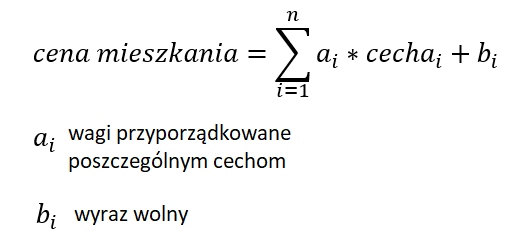

Im wartość wagi jest większa, tym większy jest wpływ cechy na wynik końcowy, czyli cenę mieszkania.
W tym przypadku zadaniem modelu jest dobór wag (współczynników wielomianów), tak aby odpowiedzi modelu różniły się od prawdziwych znanych odpowiedzi w możliwie najmniejszym stopniu.



Załóżmy, że cenę mieszkania chcemy wyznaczyć na podstawie: liczby pokojów, dzielnicy, odległości od centrum. Wzór na cenę mieszkania mógłby wyglądać następująco:

cena mieszkania=10* liczba pokojów + 20* dzielnica + 30* centrum

Zatem największy wpływ na cenę mieszkania ma odległość od centrum a najmniejszy liczba pokoi

**Klasyfikacja**

Jest procesem uczenia maszynowego pozwalającym na wykonanie predykcji cech jakościowych. Dla zadnej pary wartości cech jakościowych nie możemy zastosować operacji porównania. Cecha jakościowa, która jest przewidywana nazywana jest klasą lub etykietą.

Wyróżniamy dwa rodzaje klasyfikacji ze względu na liczbę etykiet przypisanych do obserwacji:


1.   Jednoetykietowa (single label). Do każdej obserwacji przyporządkowana jest dokładnie jedna etykieta. Jednoetykietowa klasyfikacja może być binarna lub wieloklasowa (binary or multiclass).
2.   Wieloetykietowa (multi label). Do każdej obserwacji może być przyporządkowanych więcej niż jedna etykieta.


Jako przykład klasyfikacji można podać: wykrywanie nazwy dzielnicy, wykrywanie zwierząt na rysunkach, wykrywanie języka, wykrywanie rasy psa, przewidywanie zdolności kredytowej.

Przykład:
Wykrywanie nazwy dzielnicy, w której mieszka student na podstawie współrzędnych geograficznych - szerokości i długości.

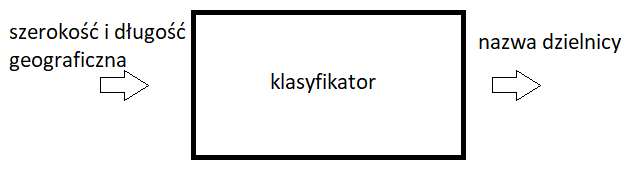

Ilustracja graficzna klasyfikacji:

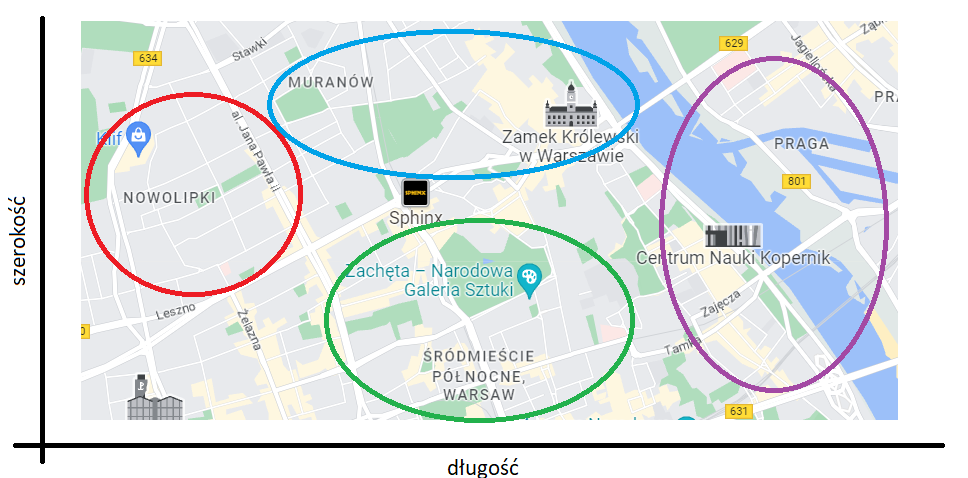


**Rodzaje klasyfikatorów:**
1.  Algorytm k Najbliższych Sąsiadów - k Nearest Neighbors (kNN):

Polega na znajdowaniu k najbliższych sąsiadów ze zbioru uczącego. Na podstawie odpowiedzi sąsiadów przypisywana jest odpowiednia klasa, do obserwacji.
Na rysunku zaznaczone są cztery klasy - dzielnice, x zaznaczone w kolorze to obserwacje czyli mieszkańcy. X ? to obserwacja, którą klasę - dzielnice musimy przypisać. Pytamy się k=2 sąsiadów do której klasy należy obserwacja. Algorytm wymaga przeskalowania danych.


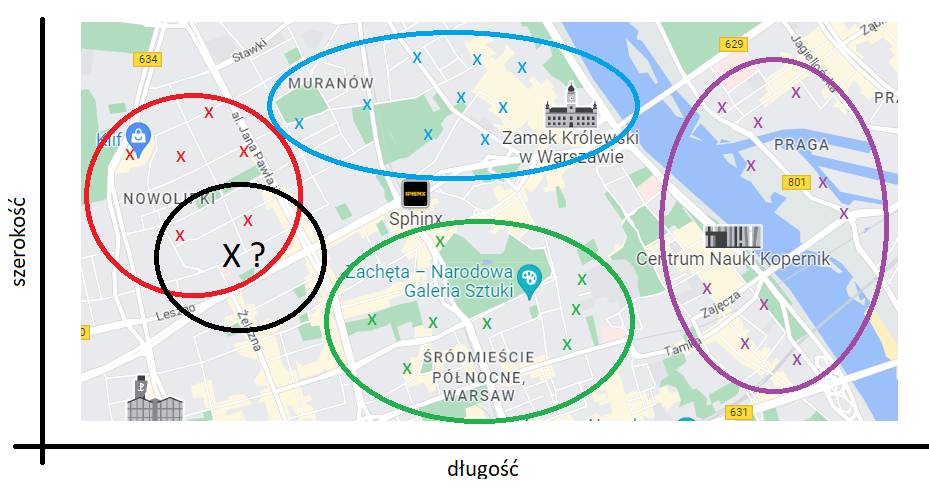

2.  Maszyna wektorów nośnych - Support Vector Machine (SVM):

Polega na utworzeniu funkcji wyznaczającej granicę każdej klasy. Funkcja przyjmuje na wejściu obserwacje zwracając 1 lub -1 w zależności od tego czy obserwacja znajduje się w danej klasie czy nie. Granica dzieląca klasy zostaje wyznaczona w taki sposób, że odległość od granicy najbliższych obserwacji poszczgólnych klas jest możliwie najmniejsza. Algorytm wymaga przeskalowania danych.

W przykładzie, klasy - dzielnice odseparowane są od siebie liniami prostymi ale mogą to być też parabole.

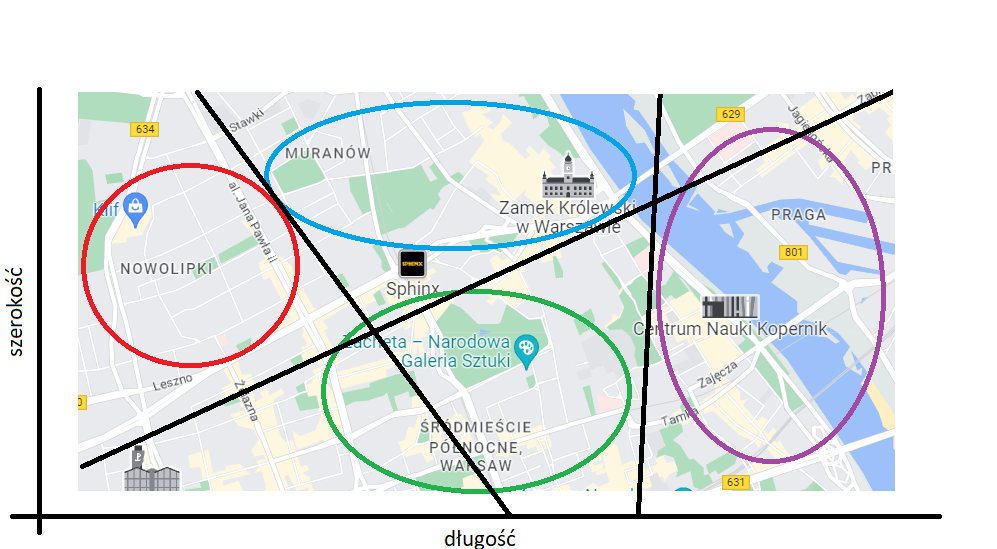

3.  Drzewo decyzyjne - Decision Tree:

Jest drzewem binanym, w którym każdy węzeł zawiera warunek podziału zbioru, czyli cechę oraz wartość graniczną. W lewym poddrzewie każdego węzła wewntętrznego są obserwacje z wartościami cechy <= wartości granicznej, w prawym z wartościami większymi od wartości granicznej.  
Za pomocą wskaźnika giniego dokonywany jest podział zbioru. Wskaźnik giniego mówi o czystości zbioru ( jeśli jest równo 0 to zbiór jest jednorodny). Zadaniem drzewa decyzyjnego jest minimalizacja wskaźnika giniego.

W drzewie ważnym parametrem modelu jest wysokość drzewa.

Jako przykład mozna podać klasyfikację, czy klient kupi telefon. Rysunek pokazuje działanie drzewa w dużym uproszczeniu.

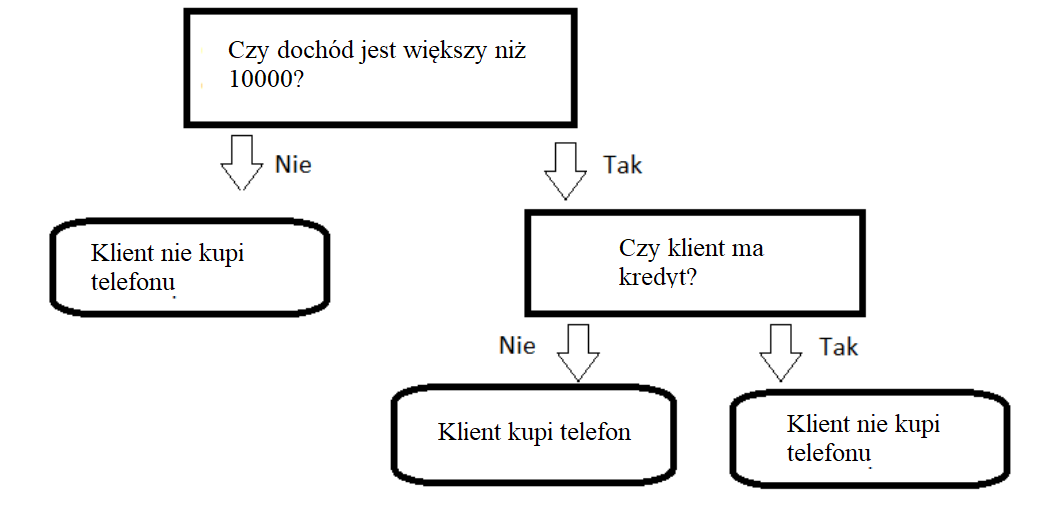

4.  Las losowy - Random Forest:

To połączenie wielu modeli drzew decyzyjnych. Każde drzewo daje prognozę klasy Klasa z największą liczbą głosów staje się klasą wiodącą. Jest to przykład uczenia zespołowego

5. Inne znane metody uczenia maszynowego to:


*   Naiwny klasyfikator Bayesa - Naive Bayesan Classifier
*   MultiLayer Perceptron
*   XGBoost Classifier

W Bibliotece sklearn oraz XGBoost można znaleźć większość modeli służących do uczenia maszynowego:

https://scikit-learn.org/stable/

https://xgboost.readthedocs.io/en/stable/

Wszystkie modele uczenia maszynowego w bibliotekach: sklearn oraz XGBoost posiadają ten sam interfejs: fit - uczenie, predict - predykcja.


**Ocena modelu klasyfikującego**

*   macierz pomyłek (confusion matrix)
*   metryki jakości klasyfikacji: accuracy, precision, recall oraz F1

Przy ocenie modelu brane pod uwage są odpowiedzi modelu (y_pred) oraz wartości prawdziwe (y_test). Metryki jakości klasyfikacji mogą zostać policzone w oparciu o macierz pomyłek.

**Macierz pomyłek**

Poniższy przykład przedstawia schemat macierzy pomyłek dla klasyfikacji dwuklasowej: czy osoba jest zdrowa czy chora - jest to problem klasyfikacji binarnej.

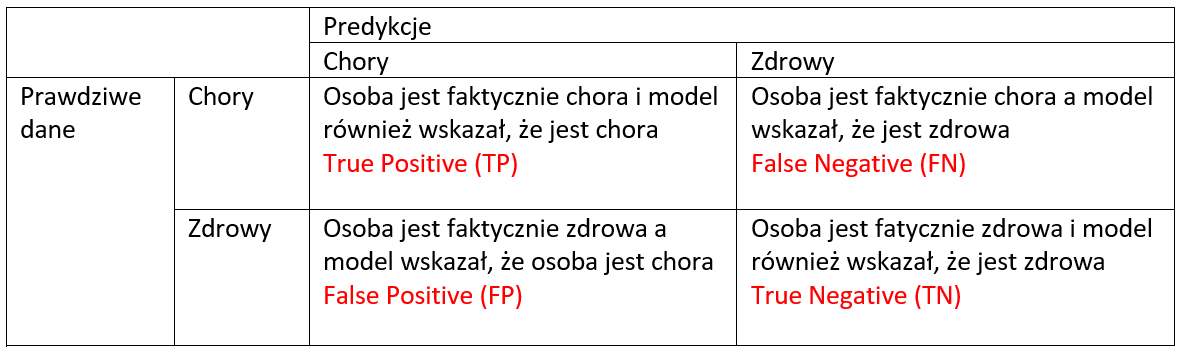

**Metryki jakości klasyfikacji**

Wartości wszystkich poniższych metryk należą do przedziału [0,1].

1.   Recall - czułość - procent wykrywanych osób chorych wśród faktycznie chorych (procent wykrywanych osób zdrowych wśród faktycznie zdrowych)
2.   Precision - precyzja - procent poprawnie wykrytych osób chorych (procent poprawnie wykrytych osób zdrowych)
3.   Accuracy - dokładność - procent poprawnych odpowiedzi modelu
4.   F1 - miara F1 - to średnia geometryczna czułości i precyzji


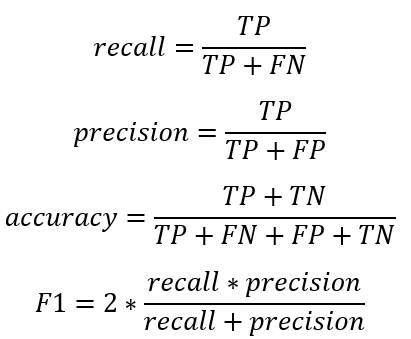




**Zadanie do zrobienia**

Na podstawie poniższej tabelki wyznacza następujące miary: recall, precision, accuracy i F1 dla klasy chory oraz dla klasy zdrowy.

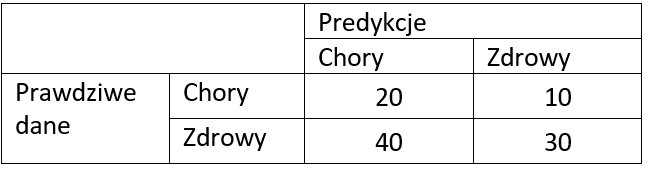

**Uwaga WAŻNE**

Nie zawsze wysokie metryki oznaczają dobrze działający klasyfikator.

Przykład


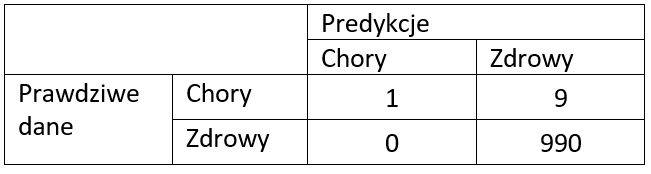

Dla klasy chory:

*   recall: 1/(1+9)=0.1
*   precision: 1/(1+0)=1
*   F1: 2*(1 * 0.1)/(1+0.1)=0.18

Dla klasy zdrowy:

*   recall: 9/(1+9) = 0.9
*   precision: 9/(9+990)=0.009
*   F1: 2*(0.9 * 0.009)/(0.9+0.009)=0.018

Dokładność:
accuracy: (1+990)/1000=0.991


Przypadek, w którym wartości wszystkich metryk osiągają maksymalne wartości
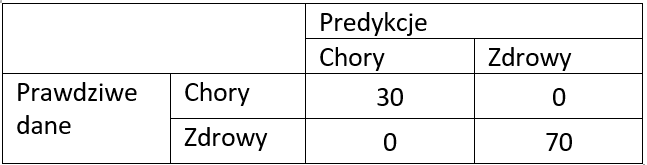

**Funkcja classification_report**

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html

In [ ]:
from sklearn.metrics import classification_report

y_pred=[1,0,1,1,0,0,1,0,1,0]
y_test=[1,1,1,1,0,0,0,1,1,1]
class_names=["Chory", "Zdrowy"]
print("Wynik funkcji classification_report")
print(classification_report(y_test, y_pred, target_names=class_names))
#dodanie parametru output_dict=True pozwala na zapisanie wynikow do slownika


Wynik funkcji classification_report
              precision    recall  f1-score   support

       Chory       0.40      0.67      0.50         3
      Zdrowy       0.80      0.57      0.67         7

    accuracy                           0.60        10
   macro avg       0.60      0.62      0.58        10
weighted avg       0.68      0.60      0.62        10



**Funkcja confusion_matrix**

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html

In [ ]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test, y_pred, labels=[0,1])
print("Wynik funkcji confusion_matrix")
print(cm)

Wynik funkcji confusion_matrix
[[2 1]
 [3 4]]


Każdą metrykę można policzyć oddzielnie:


*   recall_score: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.recall_score.html
*   precision_score: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_score.html
*   f1: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html
*   accuracy: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html




In [ ]:
from sklearn.metrics import recall_score
print("Recall dla klasy 1 czyli dla Zdrowy: ", recall_score(y_test, y_pred)) #domyslnie liczone dla klasy 1
print("Recall dla klasy 0 czyli dla Chory: ", recall_score(y_test, y_pred, pos_label=0))

Recall dla klasy 1 czyli dla Zdrowy:  0.5714285714285714
Recall dla klasy 0 czyli dla Chory:  0.6666666666666666


**Prosty przykład klasyfikacji**

Zbiór danych irysy: https://en.wikipedia.org/wiki/Iris_flower_data_set

Każda obserwacja - irys opisany jest przez cztery cechy: Petal Length, Petal Width, Sepal Length, and Sepal Width. Każdej obserwacji przyporządkowany jest jeden gatunek irysu: Setosa, Versicolour, and Virginica.
W zbiorze jest 150 obserwacji.

Zadaniem klasyfikatora jest przewidywanie gatunku irysa.

In [ ]:
from sklearn import datasets

#wczytanie danych
iris = datasets.load_iris()
#wyodrebnienie zbioru X oraz y
X = iris.data
y = iris.target
#pobranie nazw klas
class_names=iris.target_names

print("Przyklad zbioru danych X: ", X[:3,:])
print("Przyklad zbioru dnaych y: ", y[:3])
print("Nazwy klas: ", class_names)

Przyklad zbioru danych X:  [[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]]
Przyklad zbioru dnaych y:  [0 0 0]
Nazwy klas:  ['setosa' 'versicolor' 'virginica']


In [ ]:
#podzial zbioru na zbior treningowy i testowy
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
print("Rozmiar X_train", X_train.shape)
print("Rozmiar X_test", X_test.shape)
print("Rozmiar y_train", y_train.shape)
print("Rozmiar y_test", y_test.shape)

Rozmiar X_train (120, 4)
Rozmiar X_test (30, 4)
Rozmiar y_train (120,)
Rozmiar y_test (30,)


Klasyfikacja za pomoca klasyfikatora Random Forest: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

In [ ]:
from sklearn.ensemble import RandomForestClassifier

#stworzenie klasyfikatora
classifier = RandomForestClassifier()
#trening klasyfikatora
classifier.fit(X_train, y_train)
#predykcja na podstawie zbioru X_test
y_pred=classifier.predict(X_test)


Klasyfikacja za pomoca klasyfikatora SVM: https://scikit-learn.org/stable/modules/svm.html

Dane należy znormalizować przed użyciem tego klasyfikatora.

In [ ]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

#przeskalowanie danych
#fit tylko na X_train
scaler.fit(X_train)
scaler.transform(X_train)
#transform na X_test
scaler.transform(X_test)

#stworzenie klasyfikatora
classifier = SVC()
#trening klasyfikatora
classifier.fit(X_train, y_train)
#predykcja na podstawie zbioru X_test
y_pred=classifier.predict(X_test)


In [ ]:
#confusion matrix
cm=confusion_matrix(y_test, y_pred, labels=[0,1,2])
print("Confusion_matrix")
print(cm)

Confusion_matrix
[[10  0  0]
 [ 0 11  0]
 [ 0  2  7]]


In [ ]:
print("Cassification_report")
print(classification_report(y_test, y_pred, target_names=class_names))

Cassification_report
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       0.85      1.00      0.92        11
   virginica       1.00      0.78      0.88         9

    accuracy                           0.93        30
   macro avg       0.95      0.93      0.93        30
weighted avg       0.94      0.93      0.93        30



**Niedouczenie modelu (underfitting) a przeuczenie modelu (overfitting)**
Underfitting - obserwacje z jednej klasy wpadają do drugiej klasy



Overfitting - model za bardzo dostosowuje się do danych

Dlaczego się tak dzieje?
Przyczyny moga być różne, ale najczęściej przyczyną są:


*   rozmiar danych treningowych jest mały i dane nie są reprezentatywne
*   dane treningowe zawierają dużo szumu (czyli mało istotne informacje)
*   stosujemy złożony model, który "uczy się" każdej obserwacji


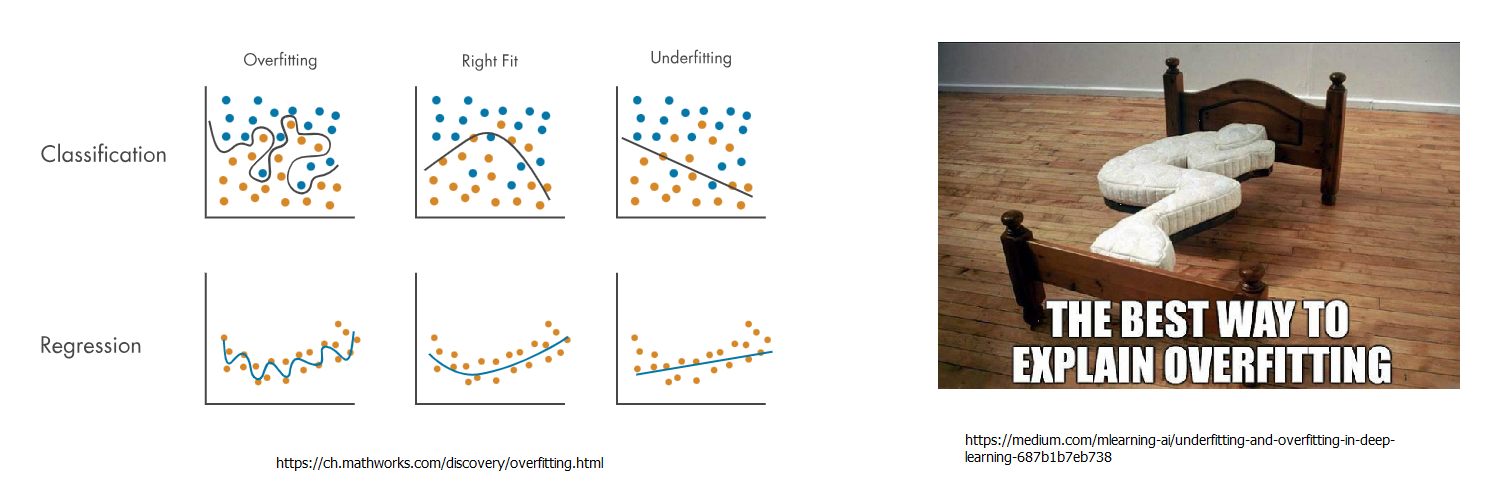

**Walidacja krzyżowa k-krotna (K-Fold Cross-Validation)**

Polega na tym, że zbiór danych dzielony jest na K części. Model uczony jest na k-1 częściach a na jednej części jest trenowany. Jest to metoda iteracyjna. W drugiej iteracji inna część jest wybierana do testowania a na reszcie model jest uczony. Liczba iteracji jest równa liczbie K. Proces powtarzany jest dopóki każda z części nie będzie zbiorem testowym.

Poniższy rysuenk pokazuje 5-częściową walidację krzyżową.
Na niebiesko zaznaczona jest część, na której będzie testowany model. Na reszcie części model będzie uczony.

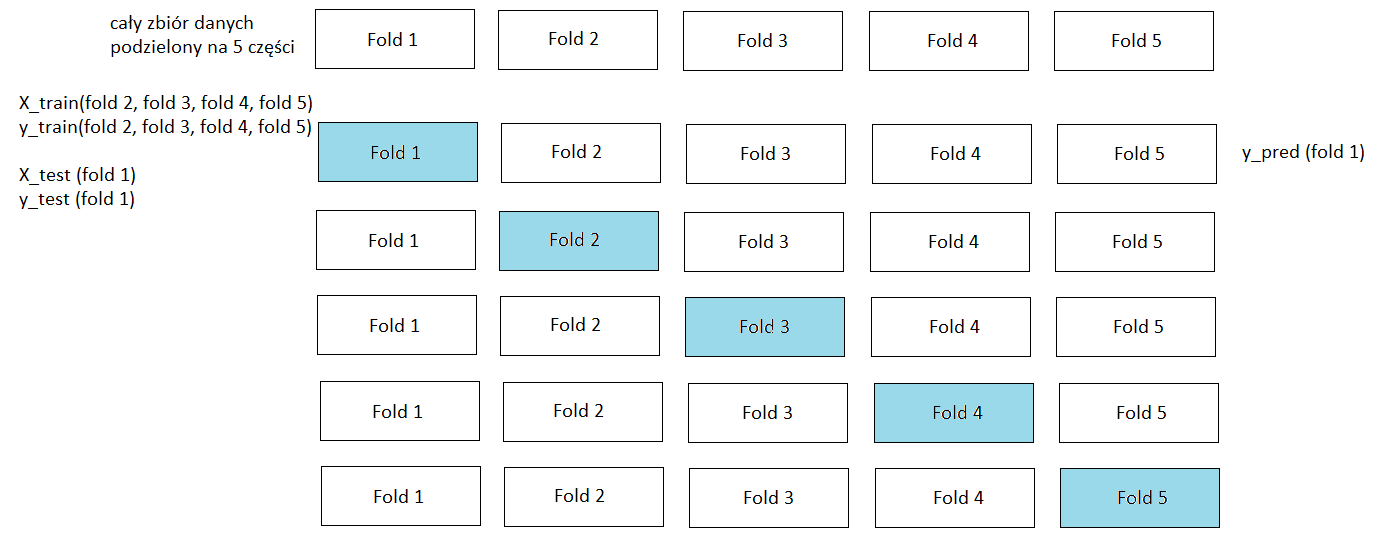

In [ ]:
from sklearn.model_selection import KFold

for i, (train_index, test_index) in enumerate(KFold(5).split(X)):
  print(f"Fold {i}")
  print(f"Train: index= {train_index}")
  print(f"Test: index= {test_index}")

Fold 0
Train: index= [ 30  31  32  33  34  35  36  37  38  39  40  41  42  43  44  45  46  47
  48  49  50  51  52  53  54  55  56  57  58  59  60  61  62  63  64  65
  66  67  68  69  70  71  72  73  74  75  76  77  78  79  80  81  82  83
  84  85  86  87  88  89  90  91  92  93  94  95  96  97  98  99 100 101
 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119
 120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137
 138 139 140 141 142 143 144 145 146 147 148 149]
Test: index= [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29]
Fold 1
Train: index= [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  60  61  62  63  64  65
  66  67  68  69  70  71  72  73  74  75  76  77  78  79  80  81  82  83
  84  85  86  87  88  89  90  91  92  93  94  95  96  97  98  99 100 101
 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119

In [ ]:
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier

for i, (train_index, test_index) in enumerate(StratifiedKFold(5).split(X,y)):
  print(f"Fold {i}")
  classifier=RandomForestClassifier()
  X_train=X[train_index]
  y_train=y[train_index]
  X_test=X[test_index]
  y_test=y[test_index]

  classifier.fit(X_train, y_train)
  y_pred=classifier.predict(X_test)

  print("Cassification_report")
  print(classification_report(y_test, y_pred, target_names=class_names))


Fold 0
Cassification_report
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       0.91      1.00      0.95        10
   virginica       1.00      0.90      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30

Fold 1
Cassification_report
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       0.91      1.00      0.95        10
   virginica       1.00      0.90      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30

Fold 2
Cassification_report
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      0.80      0.89  

**Uczenie bez nadzoru - metody klasteryzacji**

*   posiadamy dane, które nie mają przypisanych etykiet/klas
*   wprowadzamy dane do modelu bez etykiet, dopiero jako odpowiedź modelu otrzymujemy przypisane etykiety do naszych obserwacji
*   zadaniem modelu jest pogrupowanie danych
*   podstawą grupowania jest podobieństwo elementów, algorytm na tej podstawie wyodrębnia grupy
*   zastosowania: nie wiemy jak podzielić zbiór, wykrywanie anomalii, segmentacja klientów, analiza sieci społecznościowych, grupowanie wyników wyszukiwania, segmentacja obrazu
*   trzy główne algorytmy: K-means, grupowanie hierarchiczne, DBSCAN

**Algorytm k-Means**


*   grupowanie elementów na podstawie odległości
*   definiujemy ile chcemy klastrów
*   na początku nastepuje losowa inicjalizacja środka klastra (centroidu)
*   pozostałe punkty przypisane są do najbliższych punktów, które zostały wybrane jako środki klastrów
*   po przypisaniu wszystkich punktów wyznaczana są nowe środki klastrów poprzez wyliczenie średniej arytmetycznej punktów należących do danych klastrów
*   proces jest powtarzany do momentu uzyskania zbierzności. Zadaniem algorytmu jest minimalizacja odległości od środka centrodiu

*  zaleta tego algorytmu jest łatwośc implementacji
*  wadą jest grupowanie wartości odstających (jeśli takie znajduja się w zbiorze).

https://en.m.wikipedia.org/wiki/File:K-means_convergence.gif



**Algorytm DBSCAN**

*   algorytm grupuje dane ale potrafi też wydobywać outliery
*   algorytm przyjmuje dwa parametry: maksymalny promień oznaczający sąsiedztwo punktu (eps) oraz minimalna liczbę punktów do zdefiniowania klastra (sample min)
*   rozróżniane są trzy rodzaje punktów:
    *    core point - punkt główny
    *    border point - punkt graniczny
    *    outlier point - outlier
*   na wejściu podajemy dwa parametry: eps oraz sample min
*   nastepnie wybierany jest losowo punkt, określany jest rodzaj tego punktu na podstawie eps oraz sample min
*   punkty graniczne, które są osiągalne z więcej niż jednego klastra mogą należeć do dowolnego klastra w zależności od przetwarzania, wtedy możemy mieć klaster z mniejszą liczbą próbek

https://medium.com/ntust-aivc/dbscan-a-common-clustering-algorithm-including-python-code-implementation-6948d6452a83